Optimal hollow cuboid shell:
Outer (L, B, H): (2900, 5800, 2900)
Brick counts (k1, k2, k3): (29, 29, 29)
Brick orientation (l, b, h): (100, 200, 100)
Hollow inner volume: 39366000000 mm^3
Shell bricks used: 4706


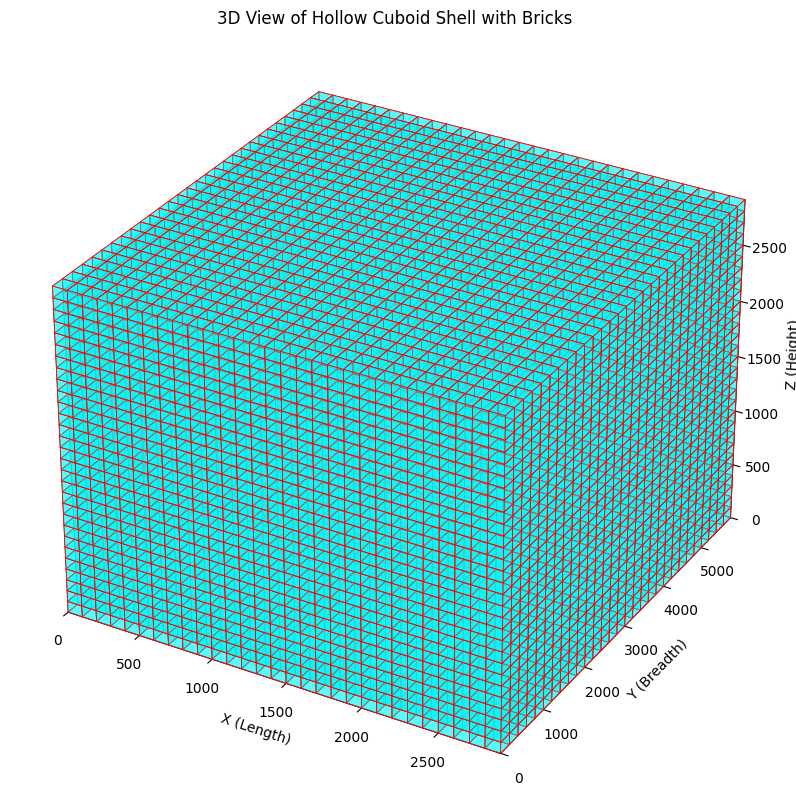

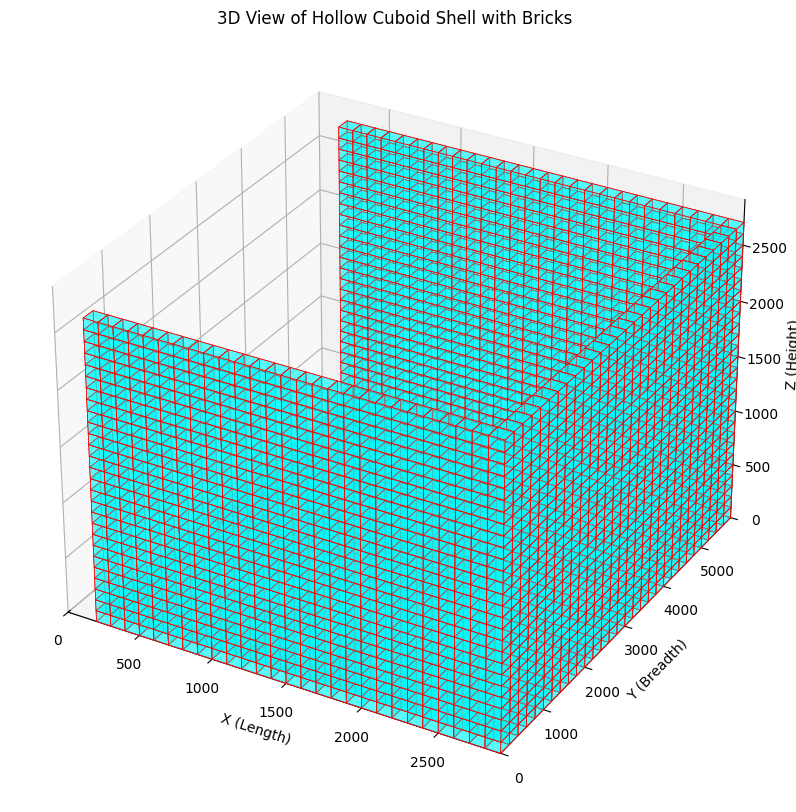

In [1]:
import matplotlib.pyplot as plt
from itertools import permutations
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def shell_bricks_count(k1, k2, k3):
    if k1 < 2 or k2 < 2 or k3 < 2:
        return None
    total_full = k1 * k2 * k3
    inner_k1 = k1 - 2
    inner_k2 = k2 - 2
    inner_k3 = k3 - 2
    inner_volume = inner_k1 * inner_k2 * inner_k3
    shell_count = total_full - inner_volume
    return shell_count

def find_optimal_hollow_cuboid(n, l, b, h):
    brick_dims = [l, b, h]
    best_volume = -1
    best_solution = None
    
    for cuboid_orientation in set(permutations(brick_dims)):
        l_c, b_c, h_c = cuboid_orientation
        max_k = int((n*2)**(1/3)) + 3
        
        for k1 in range(2, max_k):
            L = k1 * l_c
            for k2 in range(2, max_k):
                B = k2 * b_c
                for k3 in range(2, max_k):
                    H = k3 * h_c
                    
                    shell_count = shell_bricks_count(k1, k2, k3)
                    if shell_count is None or shell_count > n:
                        continue
                    inner_L = L - 2 * l_c
                    inner_B = B - 2 * b_c
                    inner_H = H - 2 * h_c
                    if inner_L <= 0 or inner_B <= 0 or inner_H <= 0:
                        continue

                    hollow_volume = inner_L * inner_B * inner_H
                    if hollow_volume > best_volume:
                        best_volume = hollow_volume
                        best_solution = {
                            'outer_dimensions': (L, B, H),
                            'brick_counts': (k1, k2, k3),
                            'brick_orientation': cuboid_orientation,
                            'hollow_volume': hollow_volume,
                            'shell_bricks': shell_count
                        }
    return best_solution

def get_shell_bricks_positions(n, l, b, h, solution, removed_top=0, removed_side=0):
    L, B, H = solution['outer_dimensions']
    k1, k2, k3 = solution['brick_counts']
    l_c, b_c, h_c = solution['brick_orientation']

    bricks = []

    def add_brick(i, j, k):
        x = i * l_c
        y = j * b_c
        z = k * h_c
        bricks.append({'index': len(bricks)+1, 'position': (x, y, z), 'orientation': (l_c, b_c, h_c),
                       'i': i, 'j': j, 'k': k})

    for i in range(k1):
        for j in range(k2):
            for k in range(k3):
                if i == 0 or i == k1-1 or j == 0 or j == k2-1 or k == 0 or k == k3-1:
                    if k3 - 1 - k < removed_top:
                        continue
                    if i < removed_side:
                        continue
                    add_brick(i, j, k)

    return bricks

def plot_3d_bricks(bricks, solution):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')

    L, B, H = solution['outer_dimensions']
    ax.set_xlim([0, L])
    ax.set_ylim([0, B])
    ax.set_zlim([0, H])
    ax.set_xlabel('X (Length)')
    ax.set_ylabel('Y (Breadth)')
    ax.set_zlabel('Z (Height)')
    ax.set_title('3D View of Hollow Cuboid Shell with Bricks')

    for brick in bricks:
        x, y, z = brick['position']
        l, w, h = brick['orientation']

        verts = [
            [(x, y, z), (x + l, y, z), (x + l, y + w, z), (x, y + w, z)],  # bottom
            [(x, y, z + h), (x + l, y, z + h), (x + l, y + w, z + h), (x, y + w, z + h)],  # top
            [(x, y, z), (x + l, y, z), (x + l, y, z + h), (x, y, z + h)],  # side 1
            [(x, y + w, z), (x + l, y + w, z), (x + l, y + w, z + h), (x, y + w, z + h)],  # side 2
            [(x, y, z), (x, y + w, z), (x, y + w, z + h), (x, y, z + h)],  # side 3
            [(x + l, y, z), (x + l, y + w, z), (x + l, y + w, z + h), (x + l, y, z + h)]  # side 4
        ]
        ax.add_collection3d(Poly3DCollection(verts, 
                                            facecolors='cyan', linewidths=0.5, edgecolors='r', alpha=0.4))

    plt.show()

# MAIN
n = 10000
l = 200
b = 100
h = 100

solution = find_optimal_hollow_cuboid(n, l, b, h)
if solution:
    print("Optimal hollow cuboid shell:")
    print(f"Outer (L, B, H): {solution['outer_dimensions']}")
    print(f"Brick counts (k1, k2, k3): {solution['brick_counts']}")
    print(f"Brick orientation (l, b, h): {solution['brick_orientation']}")
    print(f"Hollow inner volume: {solution['hollow_volume']} mm^3")
    print(f"Shell bricks used: {solution['shell_bricks']}")

    # Show initial shell bricks
    bricks = get_shell_bricks_positions(n, l, b, h, solution)
    plot_3d_bricks(bricks, solution)

    # Example: Remove 2 top layers and 1 side layer
    removed_top_layers = 2
    removed_side_layers = 2
    updated_bricks = get_shell_bricks_positions(n, l, b, h, solution,
                                                removed_top=removed_top_layers,
                                                removed_side=removed_side_layers)
    plot_3d_bricks(updated_bricks, solution)
else:
    print("No valid hollow cuboid shell found for given bricks.")
